<center><h1><b><u>Analysis of Graphs</u></b></h1></center>

## __Importing Libraries, Classes, and Functions__

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx #focuses on network analysis and graph theory; can create/visualize graphs

## __Undirected Weighted Graph Implementation Using Adjacency Matrix__

### __Definition__

In [134]:
'''Weight of edge stored in the adjacency matrix. Attempting to mimic MUTAG.'''

class WeightedGraph:
    def __init__(self, num_nodes = 5):
        self._num_nodes = num_nodes
        self._adj_matrix = np.zeros((num_nodes, num_nodes))
        self._node_indices = {} #node_label: identifier/index of adj matrix
        self._index_counter = 0

    def add_node(self, node_label):
        if self._index_counter < self._num_nodes:
            self._node_indices[node_label] = self._index_counter
            self._index_counter += 1
        else:
            print("Not enough space allocated.")

    def add_edge(self, node1, node2, weight):
        if node1 in self._node_indices and node2 in self._node_indices:
            i, j = self._node_indices[node1], self._node_indices[node2]
            self._adj_matrix[i, j] = weight
            self._adj_matrix[j, i] = weight  #Edge goes both ways for undirected
        else:
            print("One or both nodes missing.")

    @property
    def display_matrix(self):
        return self._adj_matrix

    def is_connection(self, i, j):
        return self._adj_matrix[i, j] != 0
    
    def to_nx(self):
        G = nx.Graph()
        
        for node_label in self._node_indices:
            G.add_node(node_label) #G is using nx methods; adjacency list by default; e.g. {B: {A: {weight: 1}, C: {weight: 2}}

        for node1, i in self._node_indices.items():
            for node2, j in self._node_indices.items():
                weight = self._adj_matrix[i, j]
                if self.is_connection(i,j):
                    G.add_edge(node1, node2, weight=weight)
        
        return G
    
    def visualize(self):
        G = self.to_nx()
        pos = nx.spring_layout(G) #computes positions of the nodes on the graph so theres as few edge crossings possible and edge are around same length; pos = {label: [x,y], ...}

        edges = G.edges(data=True) #[(A, B, {edgeattribute1: 2}), ...]
        weights = [attribute['weight'] for _, _, attribute in edges] #list of the weights

        plt.figure(figsize=(4,4))
        nx.draw(G, pos, with_labels=True, width = weights, node_color='lightblue', font_size = 10, node_size = 800) 
        
        edge_labels = nx.get_edge_attributes(G, 'weight') #dictionary where key is tuple for source and dest and value is the attribute (weight)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    def __str__(self):
        print("")
        connections = [] #printing connection of every node
        for node1, i in self._node_indices.items():
            for node2, j in self._node_indices.items():
                ij_connection = self._adj_matrix[i, j]
                if self.is_connection(i, j):
                    connections.append(f"{node1}--{node2}, Weight: {ij_connection}")
        return "\n".join(connections)

### __Instantiating the Graph__

In [135]:
graph = WeightedGraph()

graph.add_node('H1')
graph.add_node('H2')
graph.add_node('O')

graph.add_edge('H1', 'O', 2)
graph.add_edge('H2', 'O', 2) #double bond

print(graph._adj_matrix)
print(graph)

[[0. 0. 2. 0. 0.]
 [0. 0. 2. 0. 0.]
 [2. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

H1--O, Weight: 2.0
H2--O, Weight: 2.0
O--H1, Weight: 2.0
O--H2, Weight: 2.0


### __Visualizing the Graph__

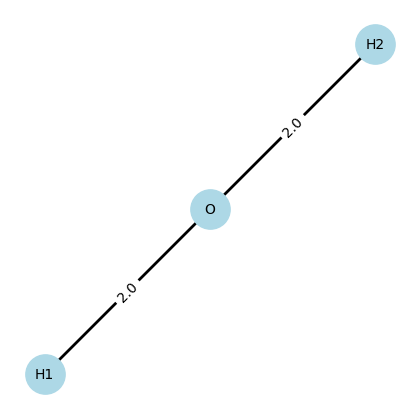

In [136]:
graph.visualize()